In [100]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The model slug is the most recently created folder in ./models/logs

TRAINED_PATH = "./models/trained"

MODEL_SLUG = sorted(os.listdir(TRAINED_PATH))[-1]
print(f"Using model {MODEL_SLUG}")

actions = pd.read_csv(f"{TRAINED_PATH}/{MODEL_SLUG}/logs/actions.csv")

plt.rcParams['figure.figsize'] = [15, 5]

plt.close()

Using model ADDQN-400m-testCourse-09-12-2023_15:44


In [101]:
# COLUMNS
# -------
# power_max_w,velocity,gradient,percent_complete,AWC,ghost_percent_complete,position,action,power_agent_w,reward,episode,ghost_action,step,total_reward

# Get all the episodes where the last step in the episode is less than 62
terminal = actions.groupby("episode").last()

winning_episodes = terminal[
    (terminal["step"] < 62) &
    ( terminal['percent_complete'] == 1.0)
    ]

print(f"Found {len(winning_episodes)} winning episodes")

# Get these episodes from the actions dataframe
winning_runs = actions[actions["episode"].isin(winning_episodes.index)]

Found 1 winning episodes


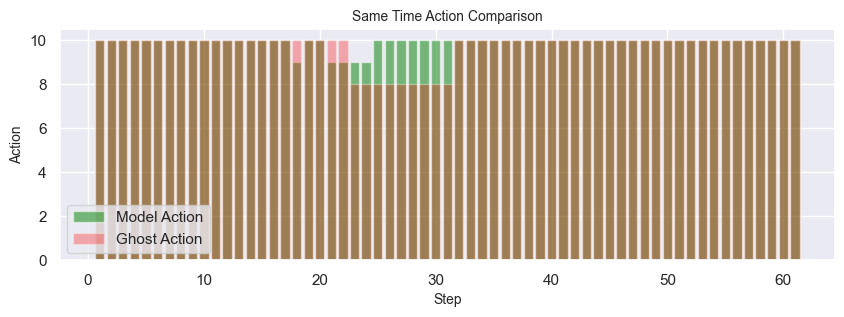

In [102]:
# get the first winning run
winning_run = winning_runs[winning_runs["episode"] == winning_episodes.index[0]]

# Set the style to a seaborn theme
sns.set_theme()

# Create a new figure with a specified size
plt.figure(figsize=(10, 3))

# Plot the first bar chart (action vs. step) with blue color and 50% opacity
plt.bar(winning_run["step"], winning_run["action"], color='green', alpha=0.5, label='Model Action')

plt.bar(winning_run["step"], winning_run["ghost_action"], color='red', alpha=0.3, label='Ghost Action')


# Add labels and title
plt.xlabel('Step', fontsize=10)
plt.ylabel('Action', fontsize=10)
plt.title('Same Time Action Comparison', fontsize=10)

# Add legend
plt.legend(loc='lower left')

# Show the plot
plt.show()